Load cellpose and utilities

In [2]:
from cellpose import io, models
import matplotlib.pyplot as plt
from csbdeep.utils import normalize
import numpy as np

## Data

You can use tiffs or PNGs or JPEGs. 

We use the io module built into cellpose to load images, however many other packages like tifffile will also work. 

Single plane images can read into data as with shape [Y,X,C] or [C,Y,X].

In [4]:
collagen_image = io.imread(filename='MAX_registered time points-1.tif')
collagen_image.shape

100%|██████████| 196/196 [00:00<00:00, 2840.76it/s]


(98, 2, 368, 341)

In this case, the image in the shape [T,C,Y,X] which includes a time component. As Cellpose only expects 3 dimensions, we can index into just 1 time frame to use the pretrained models.

In [5]:
collagen_image_at_time = collagen_image[0]
collagen_image_at_time.shape

(2, 368, 341)

## Example Image

Now that we have formatted the image correctly, we can take a look at the channels to analyze

Text(0.5, 1.0, 'Cells')

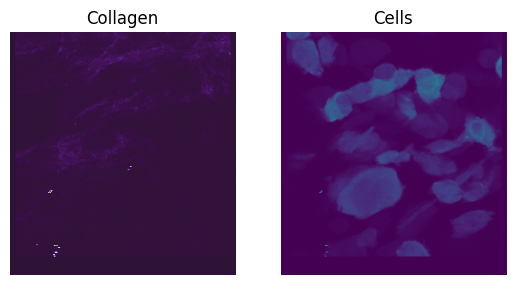

In [24]:
plt.subplot(1,2,1)
plt.imshow(collagen_image_at_time[0], cmap='twilight_shifted')
plt.axis('off')
plt.title(f'Collagen')

plt.subplot(1,2,2)
plt.imshow(collagen_image_at_time[1])
plt.axis('off')
plt.title(f'Cells')

## Pick from 4 different Cellpose models
* cyto
* cyto2
* cyto3
* ctyo4

In [ ]:
def load_all_cellpose():
    ''' Loads every pre-trained cellpose model
    
        Return:
        - models, a dictionary where keys = model name and values = loaded cellpose models  
    '''
    models = {
            'cyto'   : models.Cellpose(model_type='cyto'),
            'cyto2'  : models.Cellpose(model_type='cyto2'),
            'cyto3'  : models.Cellpose(model_type='cyto3'),
            'nuclei' : models.Cellpose(model_type='nuclei')
    }

    return models